In [ ]:
! pip install transformers
from transformers import pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/clean_rollercoaster_comments.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  69 non-null     object
dtypes: object(1)
memory usage: 684.0+ bytes


In [ ]:
# Convert the 'comment' column to a list of strings
texts = df['comment'].astype(str).fillna("").tolist()
#convert to a list of strings with .astype(str).fillna("").tolist(), so the pipeline returns a list of dicts (one per row).
texts

['This ride looks unreal It is impressive',
 'The design appears fast I want to try it',
 'The launch seems well made It seems fun',
 'The rollercoaster looks incredible It looks great',
 'The design delivers well made I like it',
 'The launch appears unreal It looks enjoyable',
 'The track layout appears powerful It looks awesome',
 'The first drop looks fast It seems fun',
 'The engineers is fast It looks great',
 'The engineers seems incredible It seems fun',
 'This ride runs thrilling It looks awesome',
 'The first drop looks unreal It is worth trying',
 'The launch seems unique I want to try it',
 'The launch is impressive It looks awesome',
 'The engineers offers smooth I want to try it',
 'The rollercoaster appears shaky I want to try it',
 'The design seems unique It is impressive',
 'The station runs fast I want to ride it',
 'The engineers appears impressive It is impressive',
 'This ride offers impressive It is exciting',
 'The launch appears fast It is worth trying',
 'The 

In [ ]:
import numpy as np

# Load a Hugging Face pipeline for extracting embeddings
embedder = pipeline("feature-extraction", model="distilbert-base-uncased")

# Generate embeddings for each text
embeddings = np.array([embedder(text)[0][0] for text in texts])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
embeddings

array([[-0.11411686, -0.15761434,  0.26942354, ..., -0.06721228,
         0.21889192,  0.16860676],
       [ 0.03759018, -0.11984172,  0.2687476 , ..., -0.13066818,
         0.10078917,  0.35409015],
       [ 0.02182504, -0.16612658,  0.32744223, ..., -0.05250557,
         0.24296547,  0.15783857],
       ...,
       [ 0.01270608, -0.04252426,  0.19337228, ..., -0.11580502,
         0.11072364,  0.17532961],
       [ 0.01666109, -0.1251922 ,  0.20891275, ..., -0.03501089,
         0.41363573,  0.33416393],
       [-0.22665809, -0.15518826,  0.36418846, ..., -0.03568903,
         0.24530265,  0.2215599 ]])

In [ ]:
embeddings.shape

(69, 768)

In [ ]:
from sklearn.cluster import KMeans

# Apply k-means clustering
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42) # creat model
clusters = kmeans.fit_predict(embeddings) # fit the model

# Print the resulting clusters # prediction
for i, cluster in enumerate(clusters):
    print(f"Text: {texts[i]} - Cluster: {cluster}")

Text: This ride looks unreal It is impressive - Cluster: 2
Text: The design appears fast I want to try it - Cluster: 5
Text: The launch seems well made It seems fun - Cluster: 3
Text: The rollercoaster looks incredible It looks great - Cluster: 1
Text: The design delivers well made I like it - Cluster: 5
Text: The launch appears unreal It looks enjoyable - Cluster: 3
Text: The track layout appears powerful It looks awesome - Cluster: 3
Text: The first drop looks fast It seems fun - Cluster: 3
Text: The engineers is fast It looks great - Cluster: 3
Text: The engineers seems incredible It seems fun - Cluster: 3
Text: This ride runs thrilling It looks awesome - Cluster: 2
Text: The first drop looks unreal It is worth trying - Cluster: 5
Text: The launch seems unique I want to try it - Cluster: 5
Text: The launch is impressive It looks awesome - Cluster: 3
Text: The engineers offers smooth I want to try it - Cluster: 5
Text: The rollercoaster appears shaky I want to try it - Cluster: 1
Tex

In [ ]:
inertia_list = []
for k in np.arange(1,70): # the structure of loop should be consistent and the next lines should be after for .
    kmn =KMeans(n_clusters = k)
    kmn.fit(embeddings)# only add your data here the rest codes are the same for your dataset
    inertia_list.append(kmn.inertia_)# make a list which we add the caluculation of inertial in each loop to this list
inertia_list # this line is out of the loop and we undestood the loop ended here.

[448.7151635620311,
 344.48260813125864,
 320.5775353929529,
 283.9361036566096,
 263.8524712780859,
 254.53538522222658,
 240.6978703269963,
 218.9212849673165,
 216.56339291631582,
 210.36449767963666,
 202.4510028174931,
 196.68036238685465,
 175.89210115408247,
 171.3326377326943,
 167.78202305123037,
 161.52961236105943,
 159.85146434305167,
 144.26391998280351,
 138.56446870352494,
 130.56312936878257,
 125.1697230337057,
 121.45463738874733,
 124.44500534013177,
 113.07372985992825,
 106.34969198063153,
 102.89168393893286,
 101.10186595103706,
 94.9915188869324,
 90.58622352723744,
 86.4545730211665,
 83.89844435885952,
 79.40601938599013,
 73.33653151030828,
 70.43182502975314,
 72.42769334174888,
 65.7181117705742,
 62.20184703510275,
 61.02219485500172,
 55.191330909095576,
 52.49452202643978,
 51.067804330116566,
 46.86498366289816,
 48.63255721931069,
 40.70025020178255,
 39.496843399366554,
 37.235671145850645,
 35.23616346197208,
 33.360198108983006,
 31.356155696319703,

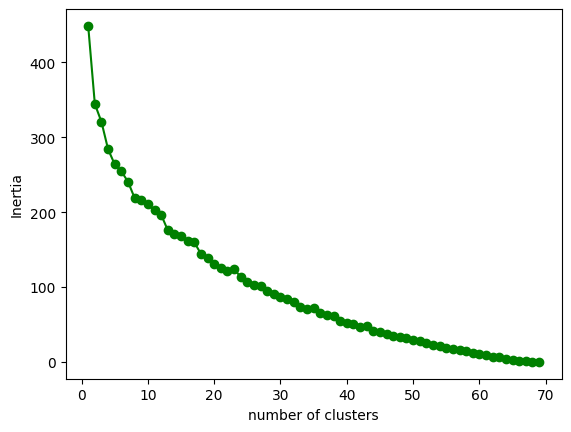

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.arange(1,70),inertia_list,'o-',c='green')
plt.xlabel('number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Initialize the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

# Define categories (labels) for classification - update these based on your desired categories
categories = ["Unhappy", "Happy" , "Curios", "Comparing", "Observing" , "Exciting"] # Example categories, replace with your actual categories


Device set to use cpu


In [ ]:
# Create a text classification pipeline using FinBERT
classifier2 = pipeline("text-classification", model="yiyanghkust/finbert-tone")

result = classifier2(texts)
print(result)

Device set to use cpu


[{'label': 'Positive', 'score': 0.9999995231628418}, {'label': 'Neutral', 'score': 0.9998706579208374}, {'label': 'Positive', 'score': 0.9564154744148254}, {'label': 'Positive', 'score': 1.0}, {'label': 'Positive', 'score': 0.9999234676361084}, {'label': 'Negative', 'score': 0.9983792304992676}, {'label': 'Positive', 'score': 0.9999998807907104}, {'label': 'Positive', 'score': 0.4670133590698242}, {'label': 'Positive', 'score': 0.9999974966049194}, {'label': 'Positive', 'score': 0.9999028444290161}, {'label': 'Positive', 'score': 0.9999994039535522}, {'label': 'Negative', 'score': 0.9142722487449646}, {'label': 'Neutral', 'score': 0.992095947265625}, {'label': 'Positive', 'score': 1.0}, {'label': 'Neutral', 'score': 0.9988229870796204}, {'label': 'Neutral', 'score': 0.9993852376937866}, {'label': 'Positive', 'score': 1.0}, {'label': 'Neutral', 'score': 0.9999051094055176}, {'label': 'Positive', 'score': 1.0}, {'label': 'Positive', 'score': 1.0}, {'label': 'Neutral', 'score': 0.99882024

In [ ]:
# Perform classification on the list of texts
results = classifier(texts, candidate_labels=categories, multi_label=True)
#
# Extract the predicted label and score from zero-shot classifier
df['predicted_label'] = [item['labels'][0] if item['labels'] else None for item in results]
df['prediction_score'] = [item['scores'][0] if item['scores'] else None for item in results]

# Extract the sentiment label and score from FinBERT classifier output (stored in 'result' variable)
df['sentiment_label'] = [finbert_output['label'] if finbert_output['label'] else None for finbert_output in result]
df['sentiment_score'] = [finbert_output['score'] if finbert_output['score'] else None for finbert_output in result]


In [ ]:
df['cluster_number'] = clusters

In [ ]:
df.head(10)

,comment,predicted_label,prediction_score,sentiment_label,sentiment_score,cluster_number
0,This ride looks unreal It is impressive,Exciting,0.999313,Positive,1.000000,2
1,The design appears fast I want to try it,Exciting,0.996904,Neutral,0.999871,5
2,The launch seems well made It seems fun,Exciting,0.998666,Positive,0.956415,3
3,The rollercoaster looks incredible It looks great,Exciting,0.998869,Positive,1.000000,1
4,The design delivers well made I like it,Exciting,0.983720,Positive,0.999923,5
5,The launch appears unreal It looks enjoyable,Exciting,0.996267,Negative,0.998379,3
6,The track layout appears powerful It looks awe...,Exciting,0.998774,Positive,1.000000,3
7,The first drop looks fast It seems fun,Exciting,0.999135,Positive,0.467013,3
8,The engineers is fast It looks great,Exciting,0.995797,Positive,0.999997,3
9,The engineers seems incredible It seems fun,Exciting,0.997747,Positive,0.999903,3
